Data source: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data

## Load data, correct data types and remove year 2012

The absence of the 2011 bull market in the dataset caused the 2012 bear market to skew the model towards a steeper, more bullish trendline. To correct this, 2012 was excluded from the analysis. Additionally, the correct data type for the 'Timestamp' column was ensured.

In [4]:
import pandas as pd
import numpy as np

# Load your current CSV
df_btcusd = pd.read_csv('btcusd.csv')

In [5]:
# Convert the 'Timestamp' column to datetime if it's not already
df_btcusd['Timestamp'] = pd.to_datetime(df_btcusd['Timestamp'], unit='s')  # Adjust if needed (e.g., 'ms' or no 'unit')

# Filter out all rows where the year is 2012
df_pruned = df_btcusd[df_btcusd['Timestamp'].dt.year != 2012].copy()

In [6]:
# Check the first few rows and data types
print(df_pruned.head())
print(df_pruned.dtypes)

                 Timestamp   Open   High    Low  Close    Volume
526379 2013-01-01 00:00:00  13.24  13.24  13.24  13.24  4.728852
526380 2013-01-01 00:01:00  13.24  13.24  13.24  13.24  0.000000
526381 2013-01-01 00:02:00  13.24  13.24  13.24  13.24  0.000000
526382 2013-01-01 00:03:00  13.24  13.24  13.24  13.24  0.000000
526383 2013-01-01 00:04:00  13.24  13.24  13.24  13.24  0.000000
Timestamp    datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
dtype: object


In [7]:
# Convert the 'Timestamp' column to datetime if it's a string
df_pruned['Timestamp'] = pd.to_datetime(df_pruned['Timestamp'])

In [8]:
# Filter out any remaining rows from 2012 (should return an empty DataFrame)
df_2012 = df_pruned[df_pruned['Timestamp'].dt.year == 2012]
print("Rows from 2012:", df_2012)

Rows from 2012: Empty DataFrame
Columns: [Timestamp, Open, High, Low, Close, Volume]
Index: []


In [9]:
# Print the earliest and latest dates to verify
print("Date range of the pruned data:")
print("Earliest date:", df_pruned['Timestamp'].min())
print("Latest date:", df_pruned['Timestamp'].max())

Date range of the pruned data:
Earliest date: 2013-01-01 00:00:00
Latest date: 2024-10-09 00:00:00


In [10]:
# Check if Timestamp's data type has been updated
df_pruned.dtypes

Timestamp    datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume              float64
dtype: object

## Check shape, unique values, null values and duplicates

In [13]:
df_pruned.shape

(6168902, 6)

In [14]:
# Count the number of unique values in each column 
nunique_values = df_pruned.nunique()
print(nunique_values)

Timestamp    6168901
Open         1695855
High         1660486
Low          1671792
Close        1687562
Volume       4653010
dtype: int64


In [15]:
# Finding the null values
print(df_pruned.isnull().sum())

Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


In [16]:
#Check if there are any duplicated rows
duplicate_rows_df_pruned = df_pruned[df_pruned.duplicated()]
print ("number of duplicate rows: ", duplicate_rows_df_pruned.shape)

number of duplicate rows:  (0, 6)


## Set date as index

In [19]:
# Convert Timestamp to datetime
df_pruned['Date'] = pd.to_datetime(df_pruned['Timestamp'], unit='s')

# Set Date as the index (optional, but useful for time-series analysis)
df_pruned.set_index('Date', inplace=True)

In [20]:
df_pruned.head(5)

,Timestamp,Open,High,Low,Close,Volume
Date,,,,,,
2013-01-01 00:00:00,2013-01-01 00:00:00,13.24,13.24,13.24,13.24,4.728852
2013-01-01 00:01:00,2013-01-01 00:01:00,13.24,13.24,13.24,13.24,0.000000
2013-01-01 00:02:00,2013-01-01 00:02:00,13.24,13.24,13.24,13.24,0.000000
2013-01-01 00:03:00,2013-01-01 00:03:00,13.24,13.24,13.24,13.24,0.000000
2013-01-01 00:04:00,2013-01-01 00:04:00,13.24,13.24,13.24,13.24,0.000000


In [21]:
# Check the values of the index (timestamps)
print(df_pruned.index)

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 00:01:00',
               '2013-01-01 00:02:00', '2013-01-01 00:03:00',
               '2013-01-01 00:04:00', '2013-01-01 00:05:00',
               '2013-01-01 00:06:00', '2013-01-01 00:07:00',
               '2013-01-01 00:08:00', '2013-01-01 00:09:00',
               ...
               '2024-10-08 23:52:00', '2024-10-08 23:53:00',
               '2024-10-08 23:54:00', '2024-10-08 23:55:00',
               '2024-10-08 23:56:00', '2024-10-08 23:57:00',
               '2024-10-08 23:58:00', '2024-10-08 23:59:00',
               '2024-10-09 00:00:00',                 'NaT'],
              dtype='datetime64[ns]', name='Date', length=6168902, freq=None)


## Log Transformation for Price and Time

In this code, the Timestamp and Close columns are transformed using log transformations to improve the analysis of time and price patterns. Timestamp is converted into seconds since the epoch, invalid values are checked, and rows with missing data are removed. This process ensures the dataset is clean and suitable for further analysis and modeling.

In [25]:
# Convert 'Timestamp' to seconds since the epoch
df_pruned['Time_in_seconds'] = (df_pruned['Timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Check for any zero or negative time values before applying the log transformation
print(df_pruned[df_pruned['Time_in_seconds'] <= 0])

Empty DataFrame
Columns: [Timestamp, Open, High, Low, Close, Volume, Time_in_seconds]
Index: []


In [26]:
# Apply log transformation to the 'Time_in_seconds' column (not 'Timestamp')
df_pruned['log_time'] = np.log(df_pruned['Time_in_seconds'])

In [27]:
# Check for NaN or inf values in 'Log_Time'
print(df_pruned[df_pruned['log_time'].isna() | np.isinf(df_pruned['log_time'])])

     Timestamp     Open     High      Low    Close    Volume  Time_in_seconds  \
Date                                                                            
NaT        NaT  57854.0  57864.0  57835.0  57835.0  1.353466              NaN   

      log_time  
Date            
NaT        NaN  


In [28]:
# Drop rows where 'Log_Time' is NaN
df_pruned = df_pruned.dropna(subset=['log_time'])
df_pruned = df_pruned.dropna(subset=['Timestamp'])

In [29]:
# Apply log transformation to the 'Close' column
df_pruned['log_price'] = np.log(df_pruned['Close'])

In [30]:
df_pruned.head(5)

,Timestamp,Open,High,Low,Close,Volume,Time_in_seconds,log_time,log_price
Date,,,,,,,,,
2013-01-01 00:00:00,2013-01-01 00:00:00,13.24,13.24,13.24,13.24,4.728852,1.356998e+09,21.028541,2.583243
2013-01-01 00:01:00,2013-01-01 00:01:00,13.24,13.24,13.24,13.24,0.000000,1.356998e+09,21.028541,2.583243
2013-01-01 00:02:00,2013-01-01 00:02:00,13.24,13.24,13.24,13.24,0.000000,1.356999e+09,21.028541,2.583243
2013-01-01 00:03:00,2013-01-01 00:03:00,13.24,13.24,13.24,13.24,0.000000,1.356999e+09,21.028541,2.583243
2013-01-01 00:04:00,2013-01-01 00:04:00,13.24,13.24,13.24,13.24,0.000000,1.356999e+09,21.028541,2.583243


In [31]:
df_pruned['log_price'].unique()

array([ 2.58324255,  2.58021683,  2.57945897, ..., 10.92642397,
       10.93144487, 10.99912877])

In [32]:
df_pruned['log_time'].unique()

array([21.02854104, 21.02854108, 21.02854113, ..., 21.27048041,
       21.27048044, 21.27048048])

## Linear Regression Model

In this section, a linear regression model is fitted to the log-transformed log_time (time) and log_price (price) data. The slope and intercept of the fitted regression line are extracted, which describe the relationship between time and price on a log-log scale. Finally, the fitted line is generated for plotting based on the calculated slope and intercept, allowing for visualization of the trend in the data.

In [36]:
from sklearn.linear_model import LinearRegression

# Prepare the features (log of time) and target (log of price)
X = df_pruned['log_time'].values.reshape(-1, 1)
y = df_pruned['log_price'].values

# Fit the linear regression to the log-log transformed data 
model = LinearRegression()
model.fit(X, y)

# Extract the slope and intercept for the line
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope: {slope}, Intercept: {intercept}")

# Generate the line for plotting
df_pruned['fitted_log_price'] = slope * df_pruned['log_time'] + intercept

Slope: 28.49305670497171, Intercept: -594.4856190776728


In [37]:
import statsmodels.api as sm

# Add a constant to the independent variable (intercept)
X = sm.add_constant(df_pruned['log_time'])

# Fit the linear regression model using statsmodels
model = sm.OLS(df_pruned['log_price'], X).fit()

# Display the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                 5.034e+07
Date:                Sun, 13 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:17:27   Log-Likelihood:            -6.4957e+06
No. Observations:             6168901   AIC:                         1.299e+07
Df Residuals:                 6168899   BIC:                         1.299e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -594.4856      0.085  -6998.036      0.0

## Linear Regression Visualisation

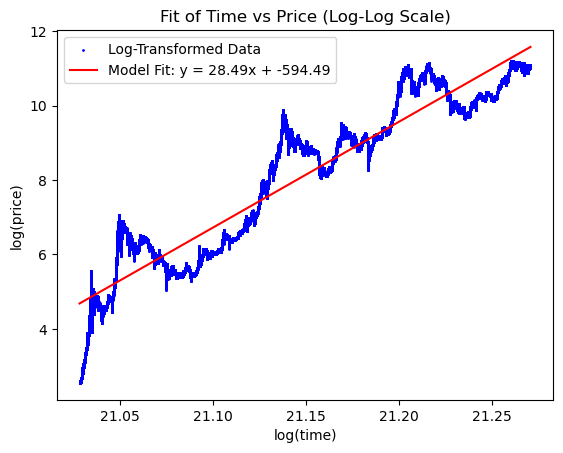

In [41]:
import matplotlib.pyplot as plt

# Plot the original data
plt.scatter(df_pruned['log_time'], df_pruned['log_price'], color='blue', label='Log-Transformed Data', s=1)

# Plot the fitted power law line
plt.plot(df_pruned['log_time'], model.predict(X), color='red', label=f'Model Fit: y = {slope:.2f}x + {intercept:.2f}')

# Label the axes
plt.xlabel('log(time)')
plt.ylabel('log(price)')

# Add title and legend
plt.title('Fit of Time vs Price (Log-Log Scale)')
plt.legend()

# Show the plot
plt.show()


This graph shows the log-log relationship between time (x-axis) and price (y-axis) for Bitcoin, with both axes plotted on a logarithmic scale.

- The blue dots represent the actual log-transformed data points for time (log(time)) and price (log(price)).
- The red line represents the fitted linear model, with the equation y = 28.49x - 594.49. This linear fit on the log-log scale suggests that the original relationship between time and price follows a power law (since a straight line in log-log space indicates a power law relationship in the original scale).

In summary, the graph demonstrates the fitted trend of Bitcoin price over time using a log-log scale, with the fitted red line indicating the general trend of price growth over time, while the actual data points fluctuate around this trend. The equation gives the slope and intercept of the fitted line, showing how price increases over time on a log scale.

## Plot Support and Resistance Trendlines, Project Future Trendlines 

This section of code calculates and plots the support and resistance trendlines for Bitcoin prices by shifting the intercept of the fitted linear model. It also projects future price trends by extending the time axis and applying the same slope used in the past, allowing for the prediction of future support and resistance levels. The code uses the last known points of support and resistance, extrapolating these trends into the future for forecasting.

In [46]:
# Add support and resistance trendlines (shift the intercept)
df_pruned['support'] = slope * df_pruned['log_time'] + (intercept - 1.2)  # Shift downward for support
df_pruned['resistance'] = slope * df_pruned['log_time'] + (intercept + 1.8)  # Shift upward for resistance

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the price range for shifting support and resistance
price_range = df_pruned['log_price'].max() - df_pruned['log_price'].min()

# Define how far into the future you want to extend (reduce the time extension)
future_time_extension = 0.1  # Adjust this as needed for how far into the future you want to predict

# Get the current maximum log_time value
current_max_log_time = df_pruned['log_time'].max()

# Create new future time values (extrapolate into the future)
future_log_time = np.linspace(current_max_log_time, current_max_log_time + future_time_extension, 100)

# Predict future prices using the power law fit
future_log_price = slope * future_log_time + intercept

# Align future support and resistance with the current lines
last_support = df_pruned['support'].iloc[-1]  # Get the last value of the current support
last_resistance = df_pruned['resistance'].iloc[-1]  # Get the last value of the current resistance
support_slope = slope  # Keep the same slope for support and resistance

# Project future support and resistance lines based on the last known points
future_support = support_slope * future_log_time + (last_support - support_slope * current_max_log_time)
future_resistance = support_slope * future_log_time + (last_resistance - support_slope * current_max_log_time)

## Plot Log-Transformed Bitcoin Price Model with Trend Lines and Future Predictions

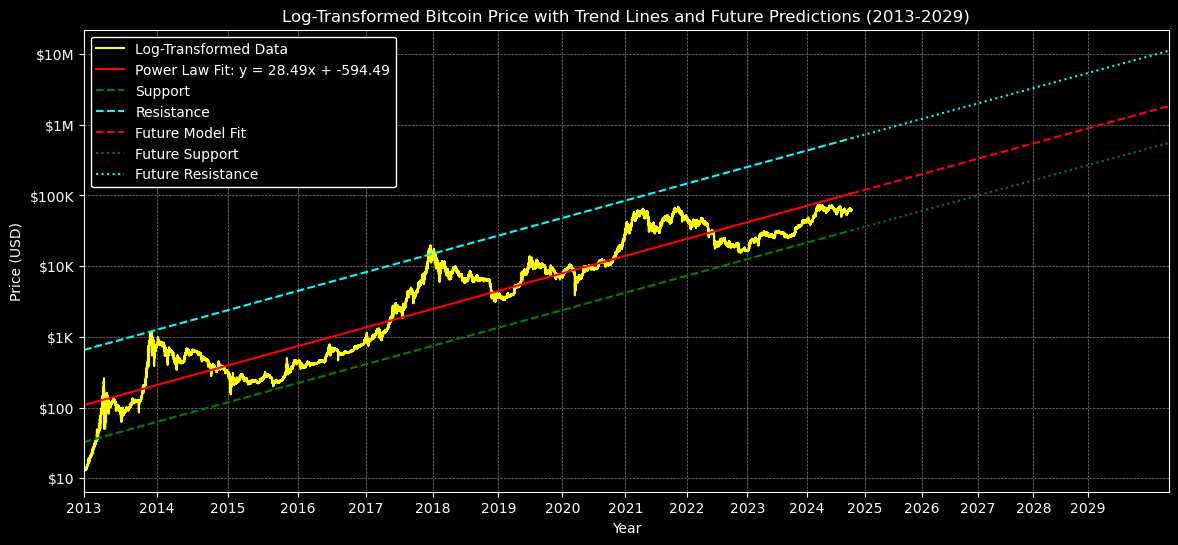

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Function to convert log_time back to actual years
def log_time_to_year(x):
    # Exponentiate to get back to original time scale (assumes 'Time_in_seconds' exists)
    seconds_since_epoch = np.exp(x)
    return pd.to_datetime(seconds_since_epoch, unit='s').year

# Function to convert log_price back to actual price
def log_price_to_price(log_price):
    # Exponentiate to convert back to actual price
    return np.exp(log_price)

# Define the actual years you want as ticks (consistent 1-year increments)
years = np.arange(2013, 2030, 1)  # From 2013 to 2029, with 1-year increments

# Convert these years to log_time for tick locations
log_time_ticks = np.log(pd.to_datetime(years, format='%Y').astype('int64') // 10**9)

# Make the graph wider
plt.figure(figsize=(14, 6))  # Adjust the figsize to make it wider

# Plot the original data
plt.style.use('dark_background')
plt.plot(df_pruned['log_time'], df_pruned['log_price'], label='Log-Transformed Data', color='yellow')

# Plot the power law fit for existing data
plt.plot(df_pruned['log_time'], df_pruned['fitted_log_price'], label=f'Power Law Fit: y = {slope:.2f}x + {intercept:.2f}', color='red')

# Plot support and resistance for existing data
plt.plot(df_pruned['log_time'], df_pruned['support'], label='Support', color='green', linestyle='--')
plt.plot(df_pruned['log_time'], df_pruned['resistance'], label='Resistance', color='cyan', linestyle='--')

# Plot future predicted power law fit
plt.plot(future_log_time, future_log_price, label='Future Model Fit', color='red', linestyle='--')

# Plot future support and resistance lines aligned with existing lines
plt.plot(future_log_time, future_support, label='Future Support', color='green', linestyle=':')
plt.plot(future_log_time, future_resistance, label='Future Resistance', color='cyan', linestyle=':')

# Set the x-axis ticks to start of each year (with consistent 1-year increments)
ax = plt.gca()  # Get the current axis
ax.set_xticks(log_time_ticks)  # Set the ticks to the start of each year

# Set the x-axis formatter to show actual years
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(log_time_to_year(x))))

# Set x-axis limits to remove empty space (adjust the lower limit as needed)
lower_limit = np.log((pd.Timestamp('2013-01-01').timestamp()))
ax.set_xlim([lower_limit, future_log_time[-1]])

### Custom ticks and labels for actual prices ###
# Define specific log price values you want as ticks (logarithmic scale)
log_price_ticks = np.log([10, 100, 1000, 10000, 100000, 1000000, 10000000])
price_labels = ['$10', '$100', '$1K', '$10K', '$100K', '$1M', '$10M']

# Apply the custom ticks and labels for years (x-axis)
plt.xticks(log_time_ticks, years)

# Apply the custom ticks and labels for price (y-axis) using actual price values
plt.yticks(log_price_ticks, price_labels)

# Add labels and title
plt.title('Log-Transformed Bitcoin Price with Trend Lines and Future Predictions (2013-2029)')
plt.xlabel('Year')  # Label the x-axis as 'Year'
plt.ylabel('Price (USD)')  # Label the y-axis as 'Price (USD)'
plt.grid(True, which="both", ls="--", linewidth=0.5, color='gray')
plt.legend(facecolor='black', framealpha=1, edgecolor='white')

# Show the plot
plt.show()

This graph displays the **log-transformed Bitcoin price in USD** over time (on a log-log scale), along with key trendlines for **support**, **resistance**, and **future price projections**.

**Key Elements:**

1. **Yellow Line (Log-Transformed Data)**: Represents the actual log-transformed historical Bitcoin prices from 2013 to the present.
2. **Red Line (Power Law Fit)**: A power law regression line fit to the log-transformed price data, which captures the overall trend of Bitcoin's price over time. The equation y=28.49x−594.49 describes the fitted line, indicating the relationship between time (log-transformed) and price (log-transformed).
    
    y=28.49x−594.49y = 28.49x - 594.49
    
3. **Green Dashed Line (Support)**: This represents the **support trendline**, indicating the lower boundary where Bitcoin prices have tended to stabilize during declines.
4. **Cyan Dashed Line (Resistance)**: The **resistance trendline** indicates the upper boundary, where prices have historically encountered resistance and failed to rise beyond this point.
5. **Red Dashed Line (Future Model Fit)**: This projects the Bitcoin price trend into the future based on the power law regression, showing the expected future trajectory if the current trend continues.
6. **Green Dotted Line (Future Support)** and **Cyan Dotted Line (Future Resistance)**: These are the projected future support and resistance lines, extrapolating the trendlines based on past data to predict potential future boundaries for price movements.

This graph shows the historical and predicted future trends for Bitcoin prices, highlighting the significant role of support and resistance levels in determining price behavior. The log-log scale is used to better capture exponential growth over time, and the future projections indicate possible paths Bitcoin prices might follow up to 2029, assuming the past trends hold.